In [ ]:
#*****************************************************************
#If you have any questions please use Q&A section on www.udemy.com
#Author - jaro.algo@icloud.com
#*****************************************************************

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [8]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2016-01-01', end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,97.948441
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.493919
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,93.625145
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,89.673714
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.147873
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


Text(0, 0.5, 'Price')

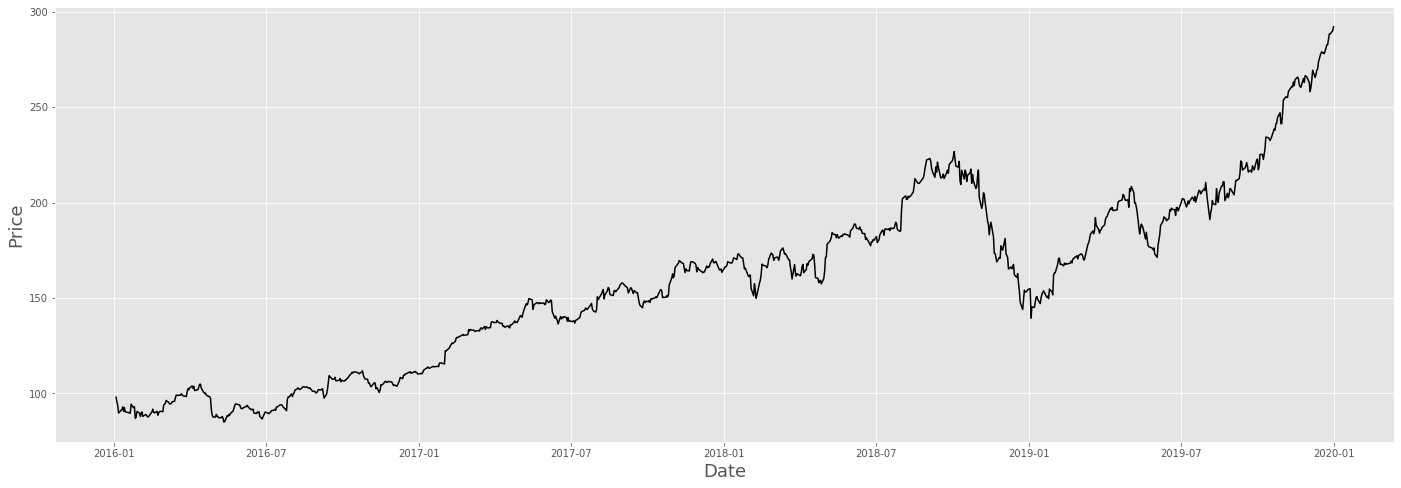

In [9]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [10]:
SMA_50 = df['Adj Close'].rolling(window = 50).mean()
SMA_200 = df['Adj Close'].rolling(window = 200).mean()

Text(0, 0.5, 'Price')

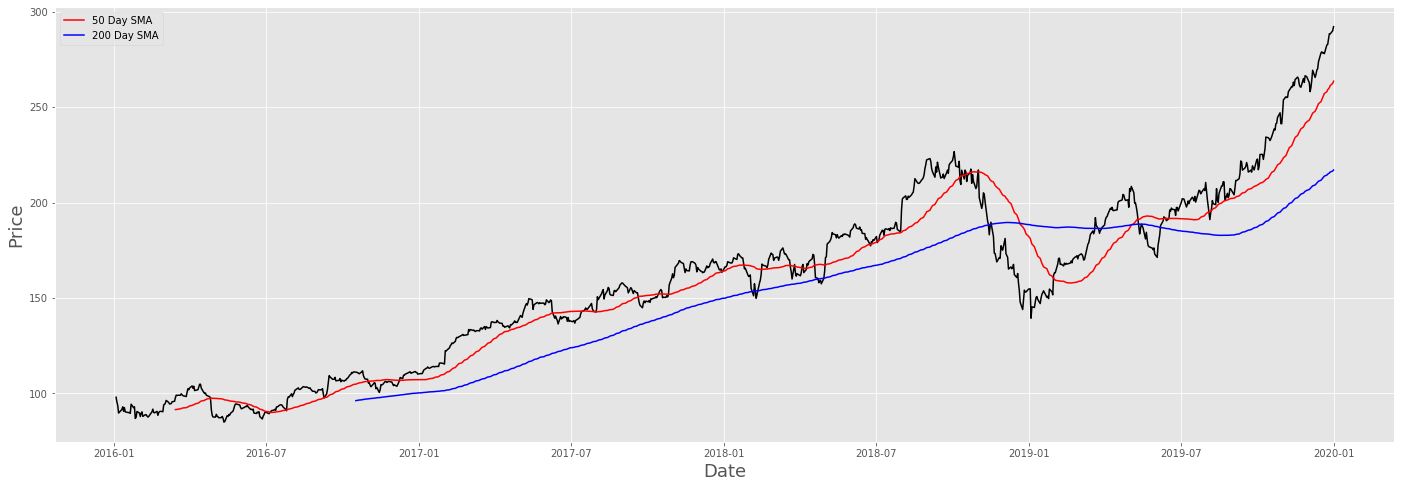

In [11]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(SMA_50, label = '50 Day SMA', color = 'red')
plt.plot(SMA_200, label = '200 Day SMA', color = 'blue')
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [13]:
EMA_50 = df['Adj Close'].ewm(span = 50).mean()
EMA_200 = df['Adj Close'].ewm(span = 200).mean()

Text(0, 0.5, 'Price')

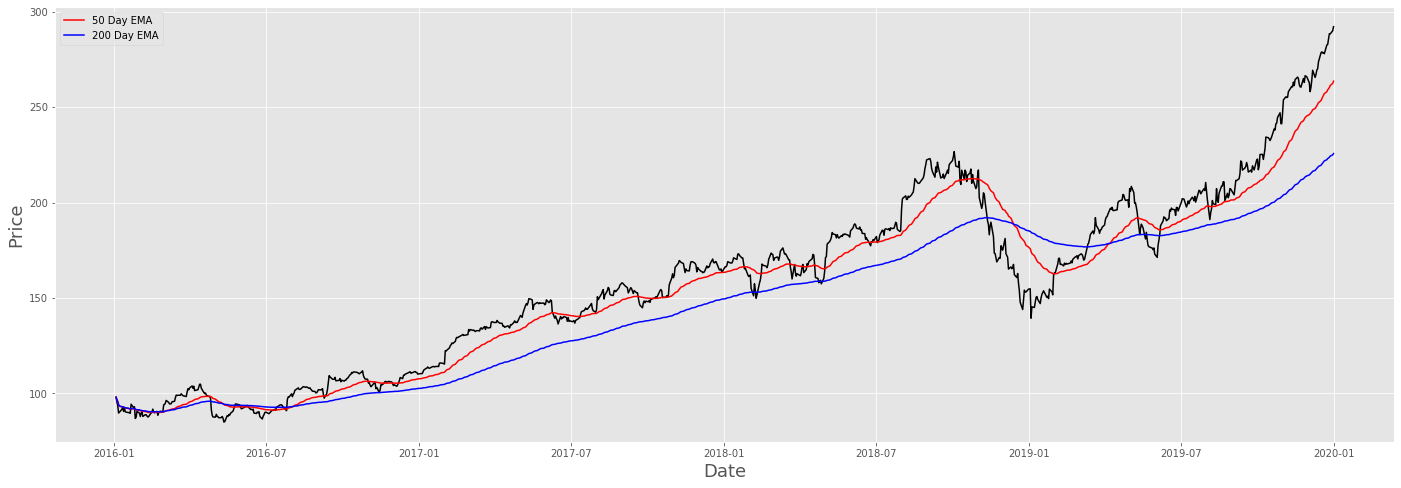

In [14]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(EMA_50, label = '50 Day EMA', color = 'red')
plt.plot(EMA_200, label = '200 Day EMA', color = 'blue')
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [18]:
df['SMA_50'] = df['Adj Close'].rolling(window = 50).mean()
df['SMA_200'] = df['Adj Close'].rolling(window = 200).mean()

crossover = ((SMA_50 <= SMA_200) & (SMA_50.shift(1) > SMA_200.shift(1)) |
             (SMA_50 >= SMA_200) & (SMA_50.shift(1) < SMA_200.shift(1)))

crossover_price = df.loc[crossover, 'SMA_200']

print(crossover_price)

Date
2018-12-21    189.026067
2019-05-06    188.443552
Name: SMA_200, dtype: float64


Text(0, 0.5, 'Price')

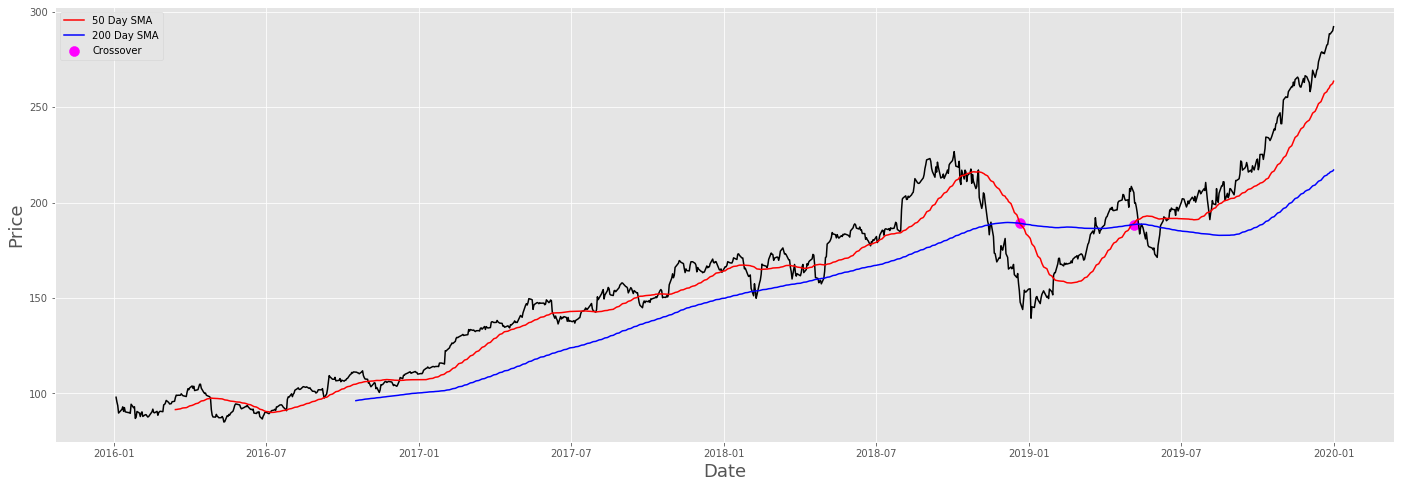

In [21]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(SMA_50, label = '50 Day SMA', color = 'red')
plt.plot(SMA_200, label = '200 Day SMA', color = 'blue')
plt.scatter(crossover_price.index, crossover_price, label = 'Crossover', color = 'magenta', s = 100)
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)